In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_loss_hist = []
valid_loss_hist = []
for i in range(1, 4):
    with open('./no_pretrained_run{}_hist.pkl'.format(i), 'rb') as f:
        tmp = pd.DataFrame({
            'type': 'no_pretrained',
            'run': i,
            'loss': pickle.load(f)[0],
            'epoch': range(1, 101)
        })
    train_loss_hist.append(tmp)
    with open('./no_pretrained_run{}_hist.pkl'.format(i), 'rb') as f:
        tmp = pd.DataFrame({
            'type': 'no_pretrained',
            'run': i,
            'loss': pickle.load(f)[1],
            'epoch': range(1, 101)
        })
    valid_loss_hist.append(tmp)
for i in range(1, 4):
    with open('./with_pretrained_run{}_hist.pkl'.format(i), 'rb') as f:
        tmp = pd.DataFrame({
            'type': 'pretrained',
            'run': i,
            'loss': pickle.load(f)[0],
            'epoch': range(1, 101)
        })
    train_loss_hist.append(tmp)
    with open('./with_pretrained_run{}_hist.pkl'.format(i), 'rb') as f:
        tmp = pd.DataFrame({
            'type': 'pretrained',
            'run': i,
            'loss': pickle.load(f)[1],
            'epoch': range(1, 101)
        })
    valid_loss_hist.append(tmp)

In [3]:
train_loss_hist = pd.concat(train_loss_hist)
valid_loss_hist = pd.concat(valid_loss_hist)

In [4]:
train_loss_hist['type'] = train_loss_hist['type'].replace({
    'no_pretrained': 'Kaimin',
    'pretrained': 'ImageNet weights'
})
valid_loss_hist['type'] = valid_loss_hist['type'].replace({
    'no_pretrained': 'Kaimin - all',
    'pretrained': 'ImageNet weights'
})

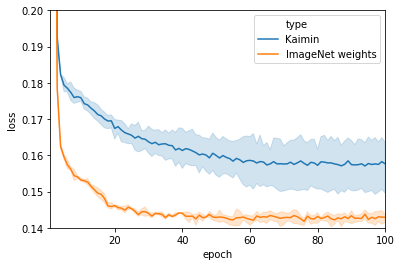

In [5]:
sns.lineplot(data=train_loss_hist, y='loss', hue='type', x='epoch');
plt.xlim(1, 100);
plt.ylim(0.14, 0.2);

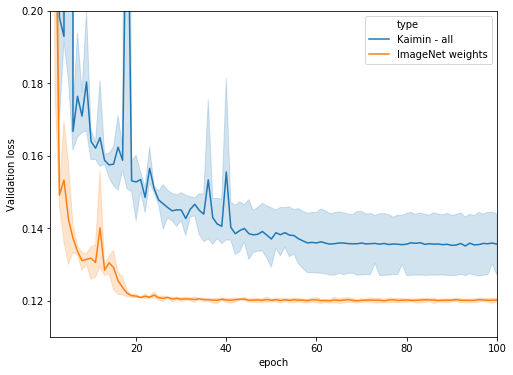

In [6]:
plt.figure(figsize=(8, 6));
sns.lineplot(data=valid_loss_hist, y='loss', hue='type', x='epoch');
plt.xlim(1, 100);
plt.ylim(0.11, 0.2);
plt.ylabel('Validation loss');

---

In [7]:
import sys
sys.path.append('../../baseline_code')

In [8]:
from metrics_test import evaluate, macro_averaged_auprc, micro_averaged_auprc

In [10]:
ans = []
for x in ['no_pretrained', 'with_pretrained']:
    for i in range(1, 4):
        
        this_ans = [x, i]
        
        df_dict = evaluate(
            './{}_run{}_model.csv'.format(x, i),
            '../../data/annotations_v030.csv',
            '../../data/dcase-ust-taxonomy.yaml',
            'coarse')
        micro_auprc, eval_df = micro_averaged_auprc(df_dict, return_df=True)
        macro_auprc, class_auprc = macro_averaged_auprc(df_dict, return_classwise=True)
        thresh_0pt5_idx = (eval_df['threshold'] >= 0.5).nonzero()[0][0]
        
        this_ans.append(micro_auprc)
        this_ans.append(macro_auprc)
        this_ans.append(eval_df['F'][thresh_0pt5_idx])
        this_ans += [class_auprc[x] for x in range(1, 9)]
        
        df_dict = evaluate(
            './{}_run{}_model.csv'.format(x, i),
            '../../data/annotations_v030.csv',
            '../../data/dcase-ust-taxonomy.yaml',
            'fine')
        micro_auprc, eval_df = micro_averaged_auprc(df_dict, return_df=True)
        macro_auprc, class_auprc = macro_averaged_auprc(df_dict, return_classwise=True)
        thresh_0pt5_idx = (eval_df['threshold'] >= 0.5).nonzero()[0][0]
        
        this_ans.append(micro_auprc)
        this_ans.append(macro_auprc)
        this_ans.append(eval_df['F'][thresh_0pt5_idx])
        this_ans += [class_auprc[x] for x in range(1, 9)]
        
        ans.append(this_ans)

/home/sai/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 1-X_engine-of-uncertain-size
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 2-X_other-unknown-impact-machinery
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 4-X_other-unknown-powered-saw
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 5-X_other-unknown-alert-signal
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column not found: 6-X_music-from-uncertain-source
  warnings.warn("Column not found: " + f)
../../baseline_code/metrics_test.py:609: UserWarning: Column

In [13]:
df = pd.DataFrame.from_records(ans, columns=[
    'type', 'run', 'coarse_micro_auprc', 'coarse_macro_auprc', 'coarse_micro_f1',
    'coarse_1', 'coarse_2', 'coarse_3', 'coarse_4', 'coarse_5', 'coarse_6', 'coarse_7', 'coarse_8', 
    'fine_micro_auprc', 'fine_macro_auprc', 'fine_micro_f1',
    'fine_1', 'fine_2', 'fine_3', 'fine_4', 'fine_5', 'fine_6', 'fine_7', 'fine_8'
])

In [17]:
df.groupby(['type'])['coarse_micro_auprc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
no_pretrained,3.0,0.762461,0.066517,0.690891,0.732497,0.774103,0.798246,0.822388
with_pretrained,3.0,0.857205,0.003307,0.853584,0.855776,0.857967,0.859016,0.860065


In [18]:
df.groupby(['type'])['coarse_macro_auprc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
no_pretrained,3.0,0.644562,0.071910,0.569777,0.610241,0.650705,0.681954,0.713203
with_pretrained,3.0,0.728655,0.021136,0.706870,0.718445,0.730021,0.739548,0.749075


In [19]:
df.groupby(['type'])['fine_micro_auprc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
no_pretrained,3.0,0.627304,0.069634,0.551274,0.596967,0.642660,0.665319,0.687979
with_pretrained,3.0,0.742116,0.003160,0.738540,0.740907,0.743275,0.743903,0.744532


In [20]:
df.groupby(['type'])['fine_macro_auprc'].describe()

,count,mean,std,min,25%,50%,75%,max
type,,,,,,,,
no_pretrained,3.0,0.533282,0.071596,0.463575,0.496610,0.529644,0.568136,0.606628
with_pretrained,3.0,0.637433,0.008649,0.627917,0.633743,0.639569,0.642192,0.644814
